#Import Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Read CSV

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preparation

1. Mencari Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Tidak ditemukan missing value

----

2. Mencari duplicate value

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


ditemukan 723 duplicate value

-----

- Handling duplicate value

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Setelah di handling dengan cara didrop didapatkan data unik sejumlah 302 baris

3. Mencari outlier




- Menggunakan Box Plot

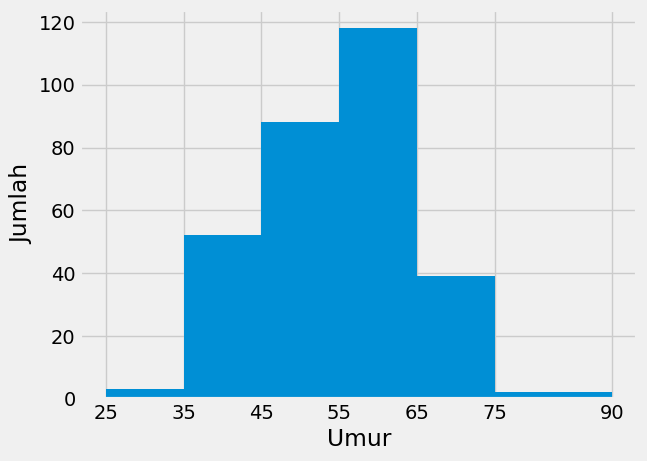

In [ ]:
fig, ax = plt.subplots()

custom_bins = [25, 35, 45, 55, 65, 75, 90]
_ = ax.hist('age', bins=custom_bins, data=df)
_ = ax.set(xlabel='Umur', ylabel='Jumlah')

_ = ax.set_xticks(custom_bins)

Dari hasil boxplot didapatkan distribusi umur paling banyak berada di umur 45 - 65 tahun.

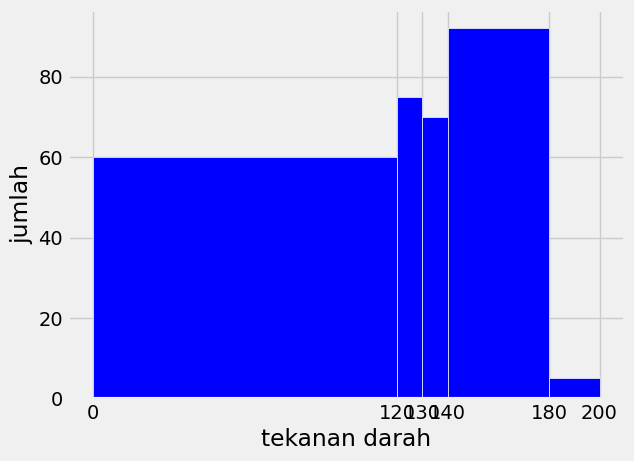

In [ ]:
fig, ax = plt.subplots()

custom_bins = [0, 120, 130, 140, 180,200]
_ = ax.hist('trestbps', bins=custom_bins, data=df,
                            facecolor='blue', edgecolor='white')
_ = ax.set_xticks(custom_bins)
_ = ax.set_ylabel('jumlah')
_ = ax.set_xlabel('tekanan darah')

Boxplot tersebut mendapatkan hasil bahwa kebanyakan pasien mengidap prahipertensi (120-129), hipertensi derajat 1 (130-139) sampai dengan hipertensi derajat 2 (140-180) dengan sebagian kecil mengidap krisis hipertensi.

https://www.alodokter.com/seperti-ini-cara-membaca-hasil-pemeriksaan-tekanan-darah

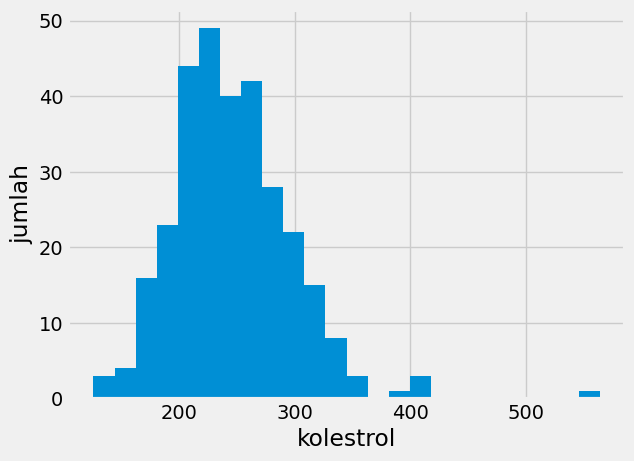

In [ ]:
fig, ax = plt.subplots()

_ = ax.hist('chol', bins='auto', data=df)
_ = ax.set_ylabel('jumlah')
_ = ax.set_xlabel('kolestrol')

Terdapat distribusi tidak normal di rentang lebih dari 380

* Handling Outlier

In [ ]:
def outmed(chol, threshold=380):
    # Hitung median
    median = np.median(chol)

    # Ganti outlier dengan median
    if chol < threshold:
      return median


In [ ]:
df ['chol'] = df['chol'].apply(outmed)

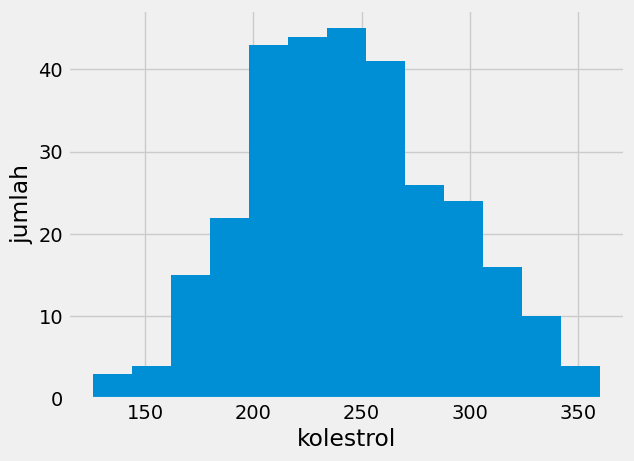

In [ ]:
fig, ax = plt.subplots()

_ = ax.hist('chol', bins='auto', data=df)
_ = ax.set_ylabel('jumlah')
_ = ax.set_xlabel('kolestrol')

Setelah handling outliers, distribusi menjadi normal.

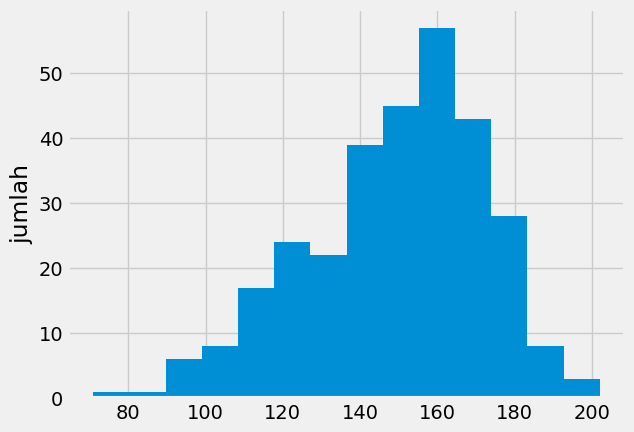

In [ ]:
fig, ax = plt.subplots()

_ = ax.hist('thalach', bins='auto', data=df)
_ = ax.set_ylabel('jumlah')
_ = ax.set_xlabel('')

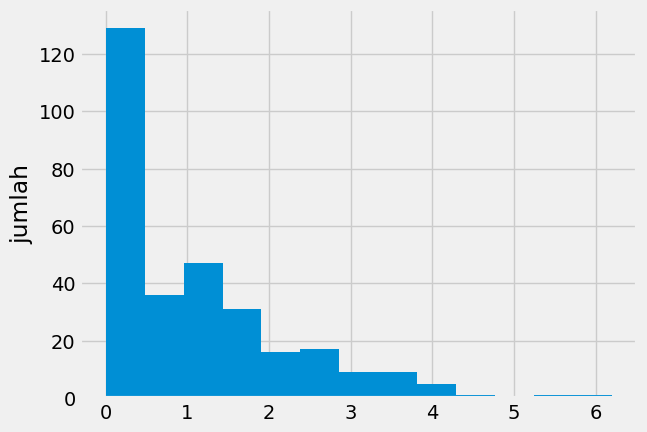

In [ ]:
fig, ax = plt.subplots()

_ = ax.hist('oldpeak', bins='auto', data=df)
_ = ax.set_ylabel('jumlah')
_ = ax.set_xlabel('')

Data di rentang 0-1 menmiliki kuantitas paling banyak.

* Menggunakan Pie Chart

In [ ]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['target'] = df['target'].astype('category')

<Axes: ylabel='count'>

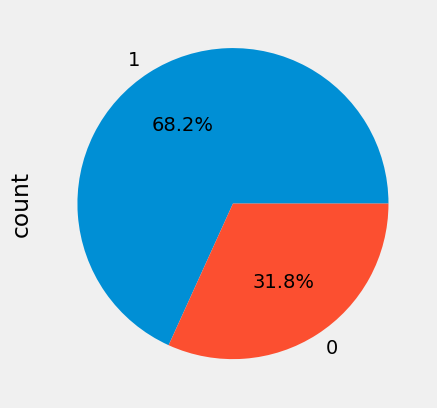

In [ ]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')

Data usia menunjukkan distribusi yang berpusat di umur 45 - 65 tahun

<Axes: ylabel='count'>

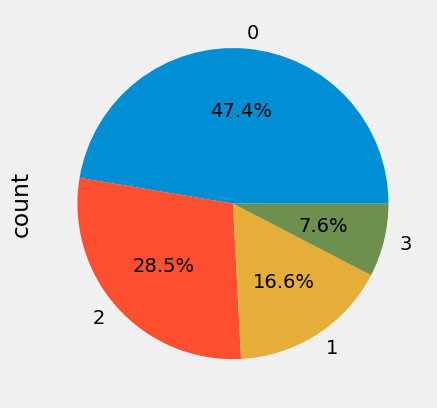

In [ ]:
df['cp'].value_counts().plot.pie(autopct='%1.1f%%')

Pasien paling banyak mengalami Atypical Angina dan Typical Angina

<Axes: ylabel='count'>

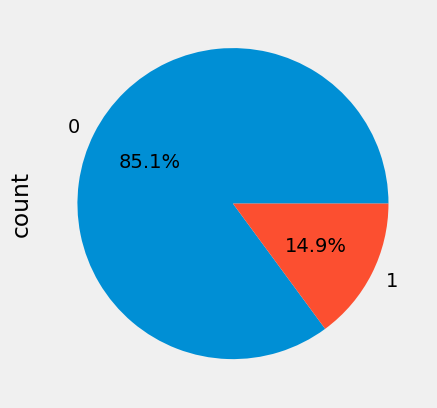

In [ ]:
df['fbs'].value_counts().plot.pie(autopct='%1.1f%%')

Hanya sebagian kecil pasien yang fasting blood sugarnya lebih dari 120 mg/dl.

<Axes: ylabel='count'>

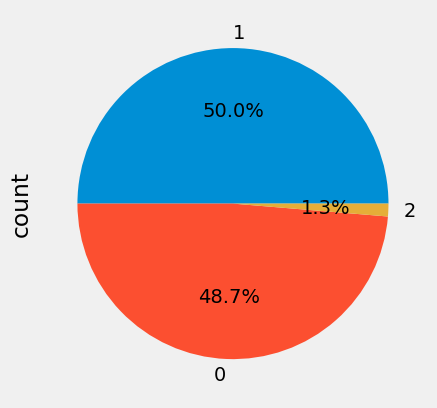

In [ ]:
df['restecg'].value_counts().plot.pie(autopct='%1.1f%%')

50% pasien berstatus normal dengan sebagian besar mengalami hipertropi dan sebagian kecil mengalami ST-T

<Axes: ylabel='count'>

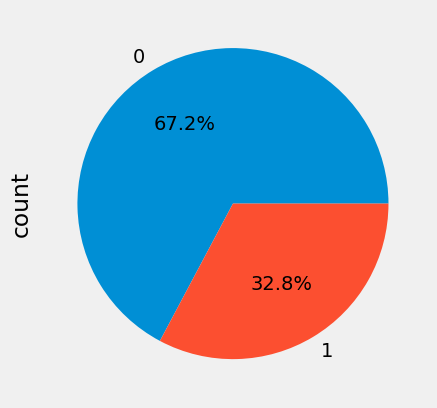

In [ ]:
df['exang'].value_counts().plot.pie(autopct='%1.1f%%')

 # Feature Jenis Kelamin

In [ ]:
def jkel (sex):
    if sex == 0:
        return 'Female'
    if sex == 1:
        return 'Male'

In [ ]:
df['Jenis_Kelamin'] = df['sex'].apply(jkel)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female


# Feature Kelompok Usia
* 0 - 44 = Muda
* 45 - 60 = Paruh Baya
* 60 - 90 = Tua

In [ ]:
def klus (age):
    if 0 <= age <= 44:
        return 'Muda'
    elif 45 <= age <= 60:
        return 'Paruh Baya'
    else:
        return 'Tua'

In [ ]:
df['Kelompok Usia'] = df['age'].apply(klus)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin,Kelompok Usia
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male,Paruh Baya
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male,Paruh Baya
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male,Tua
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male,Tua
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female,Tua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115,0,1.5,1,0,2,1,Female,Tua
733,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1,Female,Muda
739,52,1,0,128,255.0,0,1,161,1,0.0,2,1,3,0,Male,Paruh Baya
843,59,1,3,160,273.0,0,0,125,0,0.0,2,0,2,0,Male,Paruh Baya


# Feature Chest Pain
* 1 = atypical angina
* 2 = typical angina
* 3 = asymptomatic
* 4 = nonanginal pain

In [ ]:
def cpt (cp):
    if cp == 1:
        return ' atypical angina'
    elif cp == 2:
        return 'typical angina'
    elif cp == 3:
        return 'asymptomatic'
    else:
        return 'nonanginal pain'

In [ ]:
df['Chest Pain'] =df['cp'].apply(cpt)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin,Kelompok Usia,Chest Pain
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male,Paruh Baya,nonanginal pain
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male,Paruh Baya,nonanginal pain
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male,Tua,nonanginal pain
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male,Tua,nonanginal pain
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female,Tua,nonanginal pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115,0,1.5,1,0,2,1,Female,Tua,typical angina
733,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1,Female,Muda,typical angina
739,52,1,0,128,255.0,0,1,161,1,0.0,2,1,3,0,Male,Paruh Baya,nonanginal pain
843,59,1,3,160,273.0,0,0,125,0,0.0,2,0,2,0,Male,Paruh Baya,asymptomatic


#Fitur Hipertensi

In [ ]:

def tek (td):
    if 0 < td <= 120 :
        return 'Normal'
    elif 121 <= td <= 130 :
        return 'Prahipertensi'
    elif  130 < td <= 139:
        return 'Hipertensi 1'
    elif 140 < td  <= 180:
        return 'Hipertensi 2'
    else:
        return 'Krisis'

In [ ]:
df['Hipertensi'] =df['trestbps'].apply(tek)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin,Kelompok Usia,Chest Pain,Hipertensi
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male,Paruh Baya,nonanginal pain,Prahipertensi
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male,Paruh Baya,nonanginal pain,Krisis
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male,Tua,nonanginal pain,Hipertensi 2
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male,Tua,nonanginal pain,Hipertensi 2
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female,Tua,nonanginal pain,Hipertensi 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115,0,1.5,1,0,2,1,Female,Tua,typical angina,Normal
733,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1,Female,Muda,typical angina,Normal
739,52,1,0,128,255.0,0,1,161,1,0.0,2,1,3,0,Male,Paruh Baya,nonanginal pain,Prahipertensi
843,59,1,3,160,273.0,0,0,125,0,0.0,2,0,2,0,Male,Paruh Baya,asymptomatic,Hipertensi 2


# Fitur kolestrol

In [ ]:

def col (chol):
    if 0 < chol <= 200 :
        return 'Normal'
    elif 201 <= chol <= 239 :
        return 'Batas'
    else:
        return 'Tinggi'

In [ ]:
df['Tingkat Kolestrol'] =df['chol'].apply(col)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin,Kelompok Usia,Chest Pain,Hipertensi,Tingkat Kolestrol
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male,Paruh Baya,nonanginal pain,Prahipertensi,Batas
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male,Paruh Baya,nonanginal pain,Krisis,Batas
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male,Tua,nonanginal pain,Hipertensi 2,Normal
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male,Tua,nonanginal pain,Hipertensi 2,Batas
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female,Tua,nonanginal pain,Hipertensi 1,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115,0,1.5,1,0,2,1,Female,Tua,typical angina,Normal,Batas
733,44,0,2,108,141.0,0,1,175,0,0.6,1,0,2,1,Female,Muda,typical angina,Normal,Normal
739,52,1,0,128,255.0,0,1,161,1,0.0,2,1,3,0,Male,Paruh Baya,nonanginal pain,Prahipertensi,Tinggi
843,59,1,3,160,273.0,0,0,125,0,0.0,2,0,2,0,Male,Paruh Baya,asymptomatic,Hipertensi 2,Tinggi


Boxplot tersebut mendapatkan hasil bahwa kebanyakan pasien mengidap prahipertensi (120-129), hipertensi derajat 1 (130-139) sampai dengan hipertensi derajat 2 (140-180) dengan sebagian kecil mengidap krisis hipertensi.

#Assignment 3




#Seleksi Fitur


In [ ]:
data_as3 = df.copy()

In [ ]:
data_as3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Jenis_Kelamin,Kelompok Usia,Chest Pain,Hipertensi,Tingkat Kolestrol
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,Male,Paruh Baya,nonanginal pain,Prahipertensi,Batas
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,Male,Paruh Baya,nonanginal pain,Krisis,Batas
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0,Male,Tua,nonanginal pain,Hipertensi 2,Normal
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,Male,Tua,nonanginal pain,Hipertensi 2,Batas
4,62,0,0,138,294.0,1,1,106,0,1.9,1,3,2,0,Female,Tua,nonanginal pain,Hipertensi 1,Tinggi


**Encode Fitur yang Sudah Dibuat agar dapat dilihat korelasinya melalui pairplot dan Correlation Matrix**

In [ ]:
data_as3['penyakit_jantung'] = data_as3['target'].map({0:'sehat', 1:'sakit'})

In [ ]:
data_as3['encode_usia'] = data_as3['Kelompok Usia'].map({'Muda':0, 'Paruh Baya':1, 'Tua': 3})

In [ ]:
data_as3['encode_hipertensi'] = data_as3['Hipertensi'].map({'Normal':0, 'Prahipertensi':1, 'Hipertensi 1': 2, "Hipertensi 2": 3, 'Krisis': 4})

In [ ]:
data_as3['encode_kolestrol'] = data_as3['Tingkat Kolestrol'].map({'Normal':0, 'Batas':1, 'Tinggi': 2})

In [ ]:
clean_data = data_as3.copy()

In [ ]:
clean_data.drop(['Hipertensi', 'Tingkat Kolestrol', 'Chest Pain', 'Kelompok Usia', 'Jenis_Kelamin'], axis=1, inplace=True)

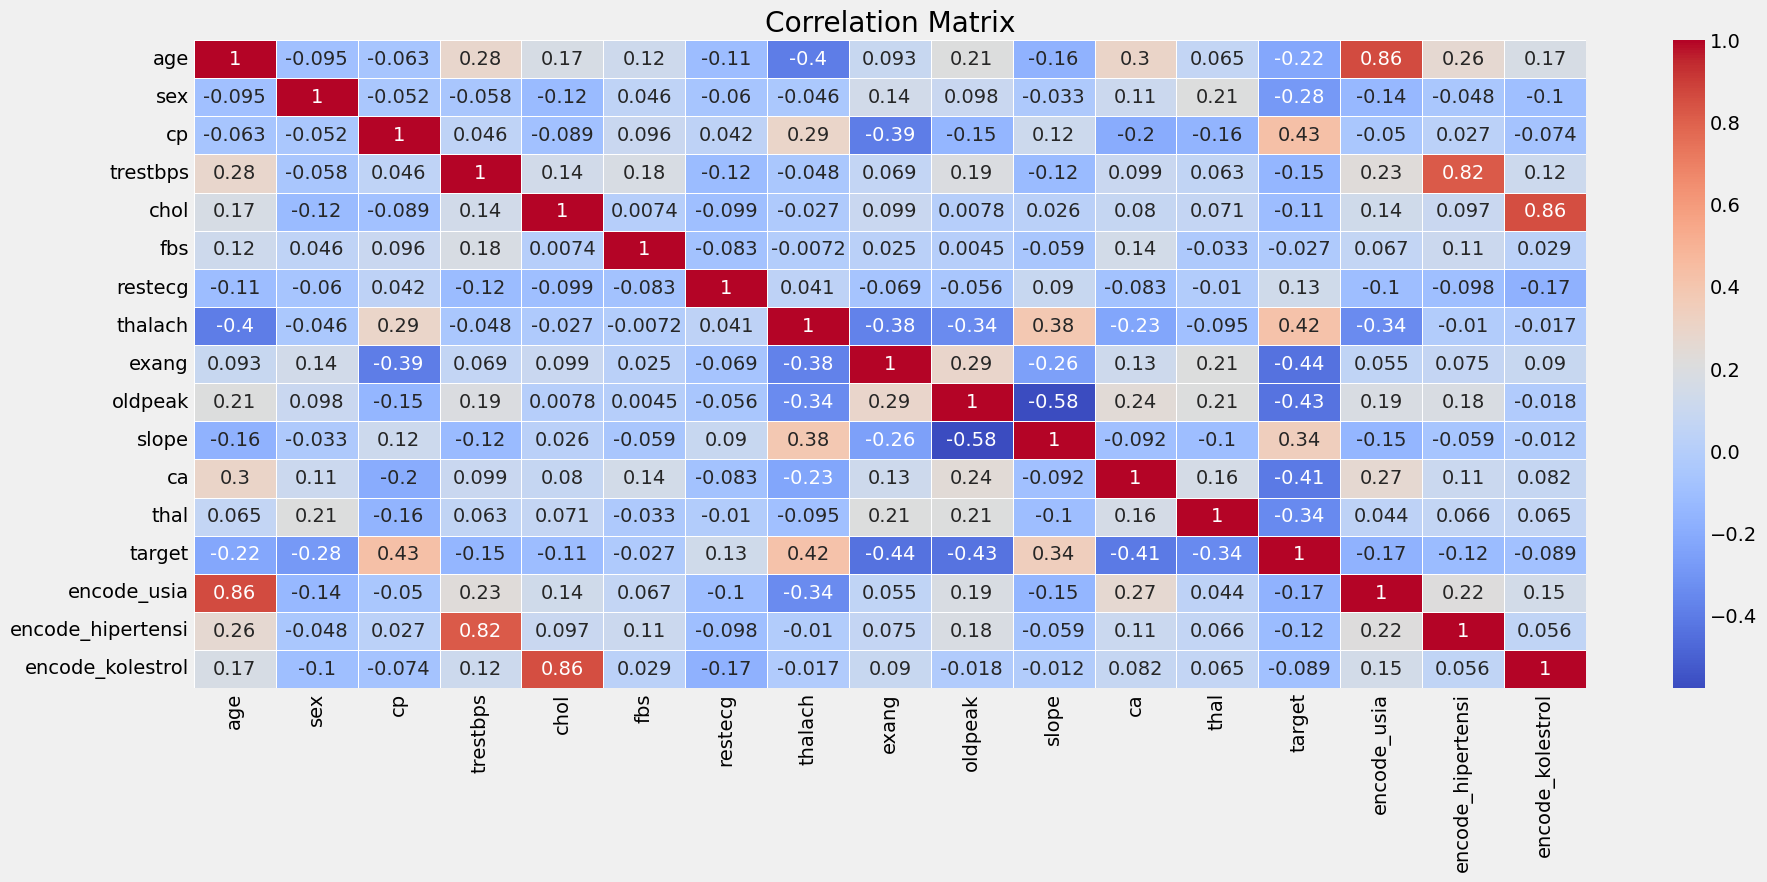

In [ ]:
correlation_matrix = clean_data.drop('penyakit_jantung', axis=1).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Korelasi positif antara feature dengan target terdapat pada feature **cp,restecg, thalach, dan slope**

#1. Jenis Machine Learning yang akan saya gunakan adalah K-NN.

#2. Menurut saya jenis Machine Learning yang cocok digunakan dalam data berikut adalah KNN. KNN saya pilih karena dimensi data yang telah diselesksi cenderung kecil dengan ukuran data hanya 300an row sehingga memungkinkan untuk dilakukan dengan menggunakan K-NN. Data yang relatif kecil dapat dikomputasikan dengan relatif singkat oleh K-NN.

#3. Eksekusi

In [ ]:
df_jantung = clean_data[['cp', 'restecg', 'thalach', 'slope', 'target', 'penyakit_jantung']]

In [ ]:
df_jantung.head()

,cp,restecg,thalach,slope,target,penyakit_jantung
0,0,1,168,2,0,sehat
1,0,0,155,0,0,sehat
2,0,1,125,0,0,sehat
3,0,1,161,2,0,sehat
4,0,1,106,1,0,sehat


a. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df_jantung, test_size = 0.25)

NB: Data akan dibagi menjadi data train (akan ditrain dan ditest) dan df_test. df_test digunakan sebagai validasi di akhir dari maachine learning yang telah ditraining dan di test

b. Model Preparation

In [ ]:
x_train = df_train.drop(columns=['target', 'penyakit_jantung']).values
y_train = df_train['target'].values

In [ ]:
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size = 0.25)

c. KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) #K = Random

In [ ]:
knn.fit(xt, yt)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn.predict(xv)

In [ ]:
np.mean(y_pred == yv)

0.631578947368421

**Akurasi sebelum masuk ke cross validation adalah 63% dengan nilai K yang dimasukkan secara random dengan nilai 2**

#4.Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
akurasi = cross_val_score(knn, xt, yt, scoring = 'accuracy', cv=6)
print(akurasi)

[0.62068966 0.60714286 0.75       0.67857143 0.71428571 0.67857143]


In [ ]:
print("Akurasi Model KNN:", np.mean(akurasi))

Akurasi Model KNN: 0.6748768472906405


#5. Penjelasan Cross Validation

**Hasil Cross Validation yang membagi data menjadi 6 bagian didapatkan hasil akurasi rata-rata sebesar 67%**

#6. Learning Curves

In [ ]:
from sklearn.model_selection import learning_curve

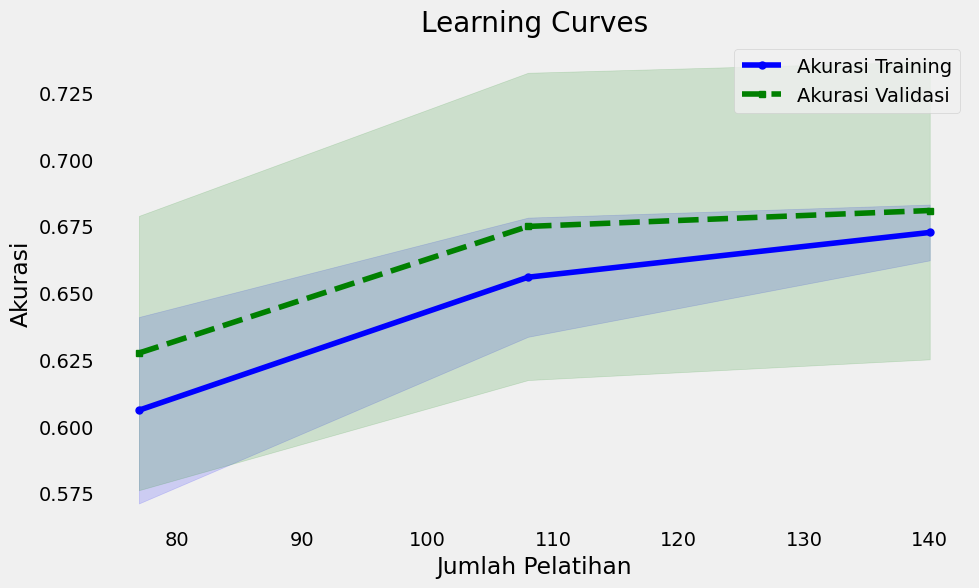

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(knn, xt, yt, cv=6)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Akurasi Training')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Akurasi Validasi')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curves')
plt.xlabel('Jumlah Pelatihan')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()
plt.show()

#7. Penjelasan Lerning Curves

**Learning Curves berikut menunjukkan peningkatan akurasi pelatihan dan validasi seiring dengan penambahan jumlah contoh pelatihan. Data yang diplot  110–140 contoh pelatihan dengan akurasi sampai dengan >65%. Ini menunjukkan model masih kurang bagus dan perlu mendapatkan tuning.**

#8. Hiperparameter Tuning

In [ ]:
for k in range(1,20):
  print(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  akurasi = cross_val_score(knn, x_train, y_train, cv = 6, scoring = 'accuracy')
  print(f'Akurasi: {np.mean(akurasi) * 100:2f}%')

1
Akurasi: 62.837838%
2
Akurasi: 59.743954%
3
Akurasi: 63.667615%
4
Akurasi: 62.778568%
5
Akurasi: 65.007112%
6
Akurasi: 62.814130%
7
Akurasi: 65.030820%
8
Akurasi: 64.141773%
9
Akurasi: 67.235657%
10
Akurasi: 65.457563%
11
Akurasi: 68.990043%
12
Akurasi: 68.990043%
13
Akurasi: 70.756283%
14
Akurasi: 70.317686%
15
Akurasi: 71.194879%
16
Akurasi: 70.756283%
17
Akurasi: 71.194879%
18
Akurasi: 70.756283%
19
Akurasi: 70.756283%


**Hiperparameter K yang coba diujikan sejumlah 20 iterasi didapatkan bahwa nilai K dengan akurasi paling tinggi adalah 15 dengan akurasi 71%**

**a. Uji pada Dataset Test**

**Model Final**

In [ ]:
model = KNeighborsClassifier(n_neighbors=15)

In [ ]:
x_test = df_test.drop(columns=['target', 'penyakit_jantung']).values
y_test = df_test['target'].values

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred_mod = model.predict(xv)

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
klasifikasitrue = y_test_pred == y_test
test_set_akurasi = np.mean(klasifikasitrue)

In [ ]:
print(f'Test Set akurasi: {test_set_akurasi * 100:2f}')

Test Set akurasi: 68.421053


**Terjadi peningkatan sebesar 5% daru semula 63% dari model awal menjadi 68%. Kenaikan dari hasil tuning kurang signifikan sehingga belum bisa menyentuh angka 70% untuk akurasi hasil tuning hyperparameter**

9. Metric Evaluation

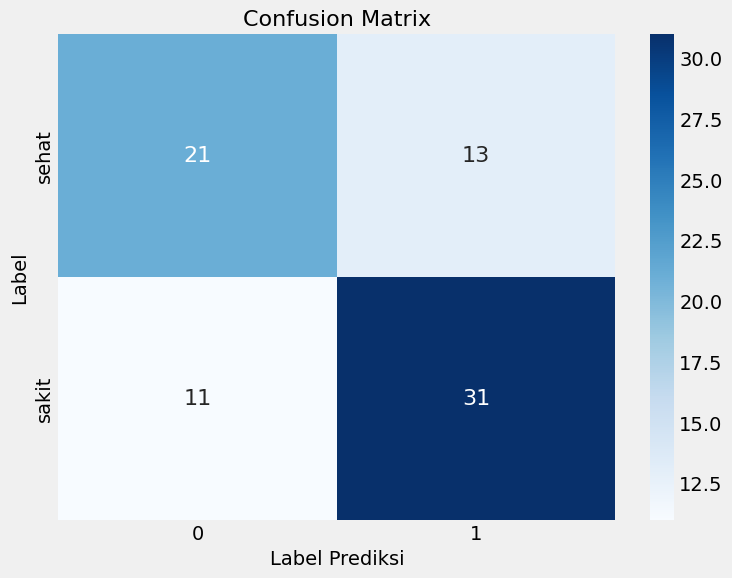

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pred, y_test)

# Plotting matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16},
            xticklabels=['0', '1'], yticklabels=['sehat', 'sakit'])
plt.xlabel('Label Prediksi', fontsize=14)
plt.ylabel('Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

#10. Interpretasi Metric Evaluasi

**True Positive (TP): Ada 21 contoh yang benar-benar diprediksi sebagai sehat.**

**False Positive (FP): Ada 13 contoh yang diprediksi sebagai sakit, tetapi sebenarnya sehat.**

**False Negative (FN): Ada 11 contoh yang diprediksi sebagai sehat, tetapi sebenarnya sakit.**

**True Negative (TN): Ada 31 contoh yang benar-benar diprediksi sebagai sakit.**